In [1]:
import numpy as np
import pandas as pd

In [2]:
orders = pd.read_csv("orders.csv")

In [3]:
orders.head()

,order_id,order_dow,order_hour_of_day,days_since_prior_order,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1597,1,8,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,4,10,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2822,0,8,29,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,2
3,2889,1,15,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3971,2,18,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
orders.dropna()

,order_id,order_dow,order_hour_of_day,days_since_prior_order,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1597,1,8,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,4,10,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2822,0,8,29,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,2
3,2889,1,15,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3971,2,18,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3419893,5,19,30,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,4
4996,3420158,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,3420769,2,17,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,3420894,0,14,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
    
basket_sets = orders.applymap(encode_units)
basket_sets.drop(['order_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace = True, axis = 1)

In [8]:
basket_sets.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [20]:
frequent_itemsets.head()

,support,itemsets
0,0.0796,(baking ingredients)
1,0.1598,(bread)
2,0.0756,(breakfast bakery)
3,0.0706,(butter)
4,0.0782,(canned jarred vegetables)


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fresh fruits),(bread),0.5456,0.1598,0.1076,0.197214,1.234131,0.020413,1.046605
1,(bread),(fresh fruits),0.1598,0.5456,0.1076,0.673342,1.234131,0.020413,1.391056
2,(fresh vegetables),(bread),0.4584,0.1598,0.0910,0.198517,1.242281,0.017748,1.048306
3,(bread),(fresh vegetables),0.1598,0.4584,0.0910,0.569462,1.242281,0.017748,1.257960
4,(packaged vegetables fruits),(bread),0.3846,0.1598,0.0800,0.208008,1.301679,0.018541,1.060870
...,...,...,...,...,...,...,...,...,...
199,"(packaged vegetables fruits, yogurt)","(fresh fruits, fresh vegetables)",0.1364,0.3282,0.0868,0.636364,1.938951,0.042034,1.847450
200,(fresh fruits),"(fresh vegetables, packaged vegetables fruits,...",0.5456,0.0978,0.0868,0.159091,1.626696,0.033440,1.072886
201,(fresh vegetables),"(fresh fruits, packaged vegetables fruits, yog...",0.4584,0.1142,0.0868,0.189354,1.658093,0.034451,1.092709
202,(packaged vegetables fruits),"(fresh fruits, fresh vegetables, yogurt)",0.3846,0.1224,0.0868,0.225689,1.843865,0.039725,1.133395


In [11]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.298093,0.298093,0.101145,0.428222,1.457115,0.029793,1.363883
std,0.154320,0.154320,0.043881,0.217113,0.202081,0.014455,0.447765
min,0.085000,0.085000,0.070200,0.128666,1.025600,0.002436,1.006752
25%,0.157600,0.157600,0.073600,0.218999,1.323671,0.021252,1.082228
50%,0.256800,0.256800,0.086800,0.385870,1.448542,0.028791,1.196217
75%,0.458400,0.458400,0.107400,0.631760,1.564155,0.033440,1.465250
max,0.545600,0.545600,0.328200,0.887526,2.056630,0.078374,4.040029


<AxesSubplot:ylabel='Frequency'>

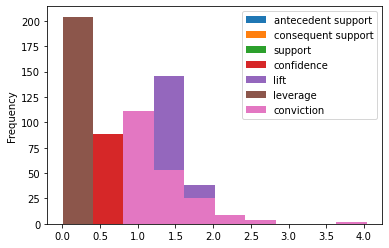

In [12]:
rules.plot.hist()

In [45]:
basket_sets.sum(axis=0).sort_values(ascending = False)

fresh fruits                  2728
fresh vegetables              2292
packaged vegetables fruits    1923
yogurt                        1284
packaged cheese               1152
                              ... 
first aid                       14
specialty wines champagnes      14
baby accessories                13
baby bath body care             11
frozen juice                    10
Length: 134, dtype: int64

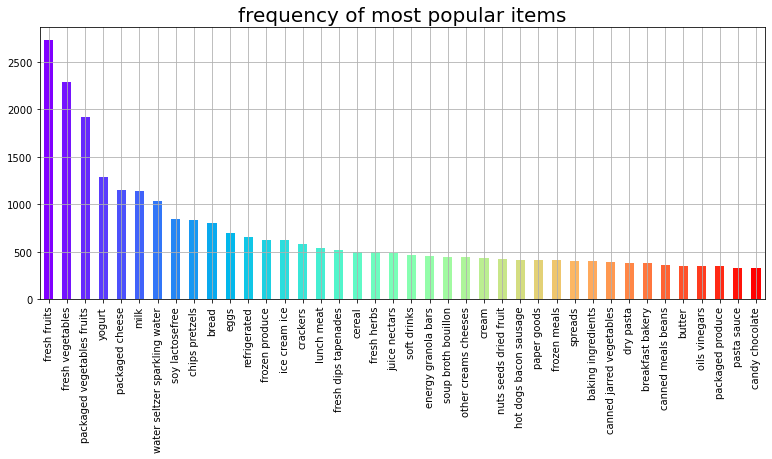

In [46]:
import matplotlib.pyplot as plt
color = plt.cm.rainbow(np.linspace(0, 1, 40))
basket_sets.sum(axis=0).sort_values(ascending = False).head(40).plot.bar(color = color, figsize=(13,5) )
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
import networkx as nx
basket_sets['food'] = 'Food'
food = basket_sets.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 'air fresheners candles', edge_attr = True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (6,6)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace('air fresheners candles', 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()